# 'Project: Problem Statement (Term Deposit Sale)'

 
**Goal:**
Using the data collected from existing customers, build a model that will help the marketing
team identify potential customers who are relatively more likely to subscribe term deposit
and thus increase their hit ratio. 

**Resources Available**
The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

**Attribute Information:**<br>
Input variables:<br><br>
<u>Bank client data:</u>
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account <br><br>
<u>Related to previous contact:</u>
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*<br><br>
<u>Other attributes:</u>
13. campaign: number of contacts performed during this campaign and for this
client
14. pdays: number of days that passed by after the client was last contacted from a
previous campaign (-1 tells us the person has not been contacted or contact
period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last
campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign <br><br>
**<u>Output variable (desired target):</u>**
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

### 1) Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
#### 1. Univariate analysis (12 marks)
a. Univariate analysis – data types and description of the independent attributes
which should include (name, meaning, range of values observed, central values
(mean and median), standard deviation and quartiles, analysis of the body of
distributions / tails, missing values, outliers.<br>
b. Strategies to address the different data challenges such as data pollution, outlier’s
treatment and missing values treatment.<br>
c. Please provide comments in jupyter notebook regarding the steps you take and
insights drawn from the plots.<br>
#### 2. Multivariate analysis (8 marks)
a. Bi-variate analysis between the predictor variables and target column. Comment
on your findings in terms of their relationship and degree of relation if any.
Visualize the analysis using boxplots and pair plots, histograms or density curves.
Select the most appropriate attributes.<br>
b. Please provide comments in jupyter notebook regarding the steps you take and
insights drawn from the plots


In [20]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Libraries
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import pandas_profiling 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score, accuracy_score

#Dataset
bank = pd.read_csv('bank-full.csv')

In [4]:
# a. Univariate analysis – data types and description of the independent attributes which should include (name, 
# meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis 
# of the body of distributions / tails, missing values, outliers.

#quick look at the data
bank.head(10)

#output: lots of categorical categories that should be converted (job, marital, education, default, housing, loan, contact, 
#month, poutcome, Target)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [6]:
#convert objects to category
cat_col = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 
        'day', 'poutcome', 'Target']

for column in cat_col:
    bank[column] = bank[column].astype('category')

In [7]:
bank.dtypes

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day          category
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
Target       category
dtype: object

In [8]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
#shape
bank.shape

(45211, 17)

In [10]:
#convert following to yes/no binary (int32):default, housing, loan, Target
bank['default'] = bank['default'].map({'yes': 1, 'no': 0})
bank['housing'] = bank['housing'].map({'yes': 1, 'no': 0})
bank['loan'] = bank['loan'].map({'yes': 1, 'no': 0})
bank['Target'] = bank['Target'].map({'yes': 1, 'no': 0})

In [11]:
bank['month'] = bank['month'].map({'jan': 1, 'feb': 2,'mar': 3,'apr': 4,'may': 5,'jun': 6,'jul': 7,'aug': 8,'sep': 9,
                                  'oct': 10,'nov': 11,'dec': 12})

In [12]:
bank.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,0,2143,1,0,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,5,198,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,5,5,139,1,-1,0,unknown,0
6,28,management,single,tertiary,0,447,1,1,unknown,5,5,217,1,-1,0,unknown,0
7,42,entrepreneur,divorced,tertiary,1,2,1,0,unknown,5,5,380,1,-1,0,unknown,0
8,58,retired,married,primary,0,121,1,0,unknown,5,5,50,1,-1,0,unknown,0
9,43,technician,single,secondary,0,593,1,0,unknown,5,5,55,1,-1,0,unknown,0


In [13]:
#description of attributes
bank.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [14]:
#count of unique values
bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [15]:
#missing values
bank.isnull().sum()

#output: no values missing

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

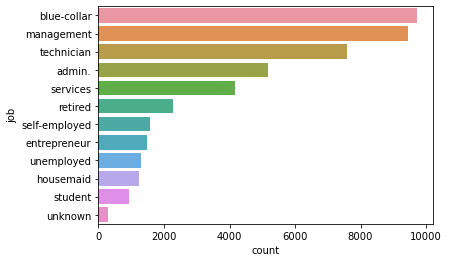

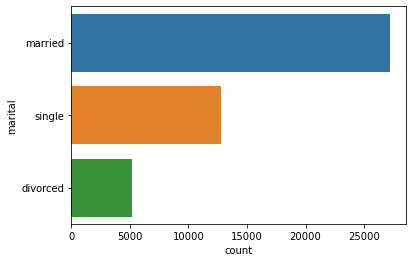

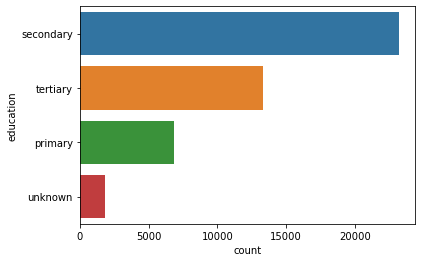

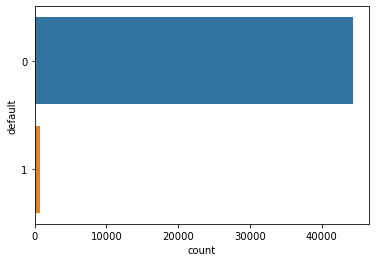

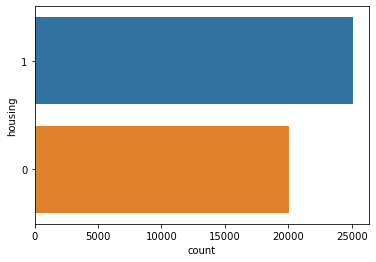

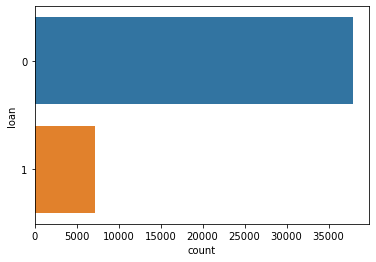

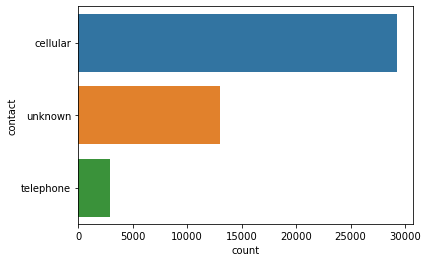

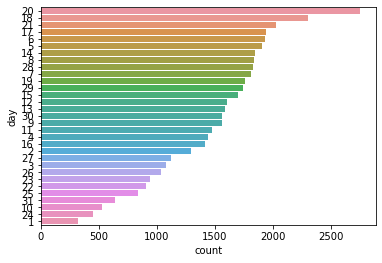

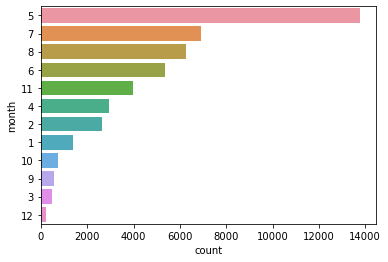

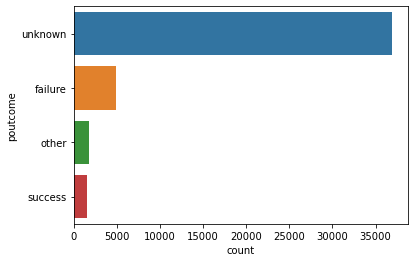

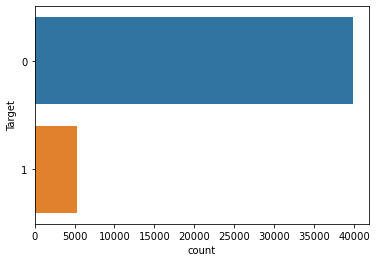

In [16]:
#univariate: look at categorical fields first

for feature in bank.dtypes[bank.dtypes == 'category'].index:
    sns.countplot(y=feature, data=bank, order = bank[feature].value_counts().index)
    plt.show()

In [17]:
for feature in bank.dtypes[bank.dtypes == 'category'].index:
    print(feature)
    print(bank[feature].value_counts(normalize=True)*100)
    print('')

job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64

marital
married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64

education
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64

default
0    98.197341
1     1.802659
Name: default, dtype: float64

housing
1    55.583818
0    44.416182
Name: housing, dtype: float64

loan
0    83.977351
1    16.022649
Name: loan, dtype: float64

contact
cellular     64.774059
unknown      28.798301
telephone     6.427639
Name: contact, dtype: float64

day
20    6.087014
18    5.104952
21    4.481210
17    4.288779
6     4.273296
5     4.224636
14

### Categorical Univariate Analysis:
--Jobs: more than half of jobs are in blue-collar, management, technician, admin (combine some?)<br>
--Marital: 60% of people are married<br>
--Education: 50%+ completed secondary school (high school)<br>
--default: 98% of people have not defaulted<br>
--Housing: 55% of people have a housing loan open<br>
--Loan: 83% of people have personal loans open<br>
--Contact: 64% of people use their cell phones for communication; 28% are unknown<br>
--Day: about 20% of people were last contacted mid month<br>
--Month: seems like majority of people were last contacted in the summer time<br>
--Previous Outcome: seems like 'unknown' and 'other' are customers that are new to the bank, so they were not involved in last
campaign--may filter or drop later<br>
--Target: majority of people did not get a term deposit
<br><br>
Default might get dropped because it is almost 100% no


age


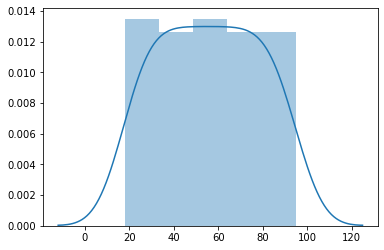


balance


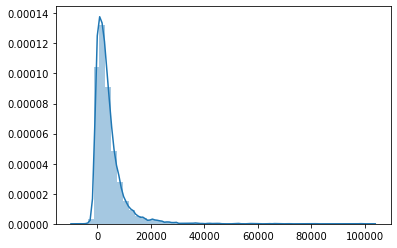


duration


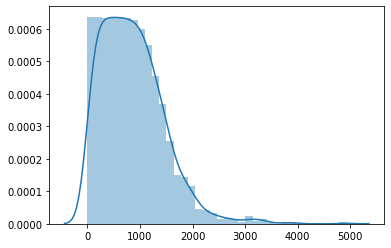


campaign


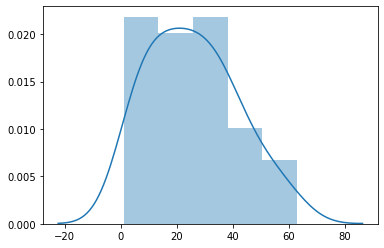


pdays


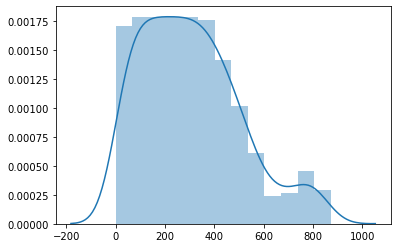


previous


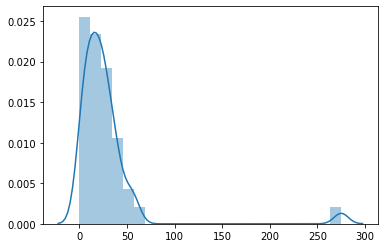

In [18]:
#univariate: numerical fields

for feature in bank.dtypes[bank.dtypes == 'int64'].index:
    print(feature)
    sns.distplot(bank[feature].value_counts().index)
    plt.show()
    print('')

### Numerical Univariate Analysis:
--Age: looks to be evenly distributed across recorded age groups <br>
--Balance: positively skewed with most clients have <$20,000 balance<br>
--Duration: positively skewed with most clients only chatting <30mins<br>
--Campaign: almost nice even distribution for number of those contacted<br>
--Pdays: looks almost evenly distributed<br>
--Previous: positively skewed with the client being mostly contacted within 50 days <br>

**b. Strategies to address the different data challenges such as data pollution, outlier’s
treatment and missing values treatment.<br>
c. Please provide comments in jupyter notebook regarding the steps you take and
insights drawn from the plots.<br>**

b. Will need to clean up the 'unknown' categories that are small/insignficant for the attributes. 
Will also try to combine fields that may seem similar like 'single'/'divorced' for marital attribute. Also, some may exist
for job field. Fortunately, there are no missing values to have to impute. I will make changes after multivariate analysis.<br>
c. I have done so in the "Categorical Univariate Analysis" and "Numerical Univariate Analysis" markdown boxes above.

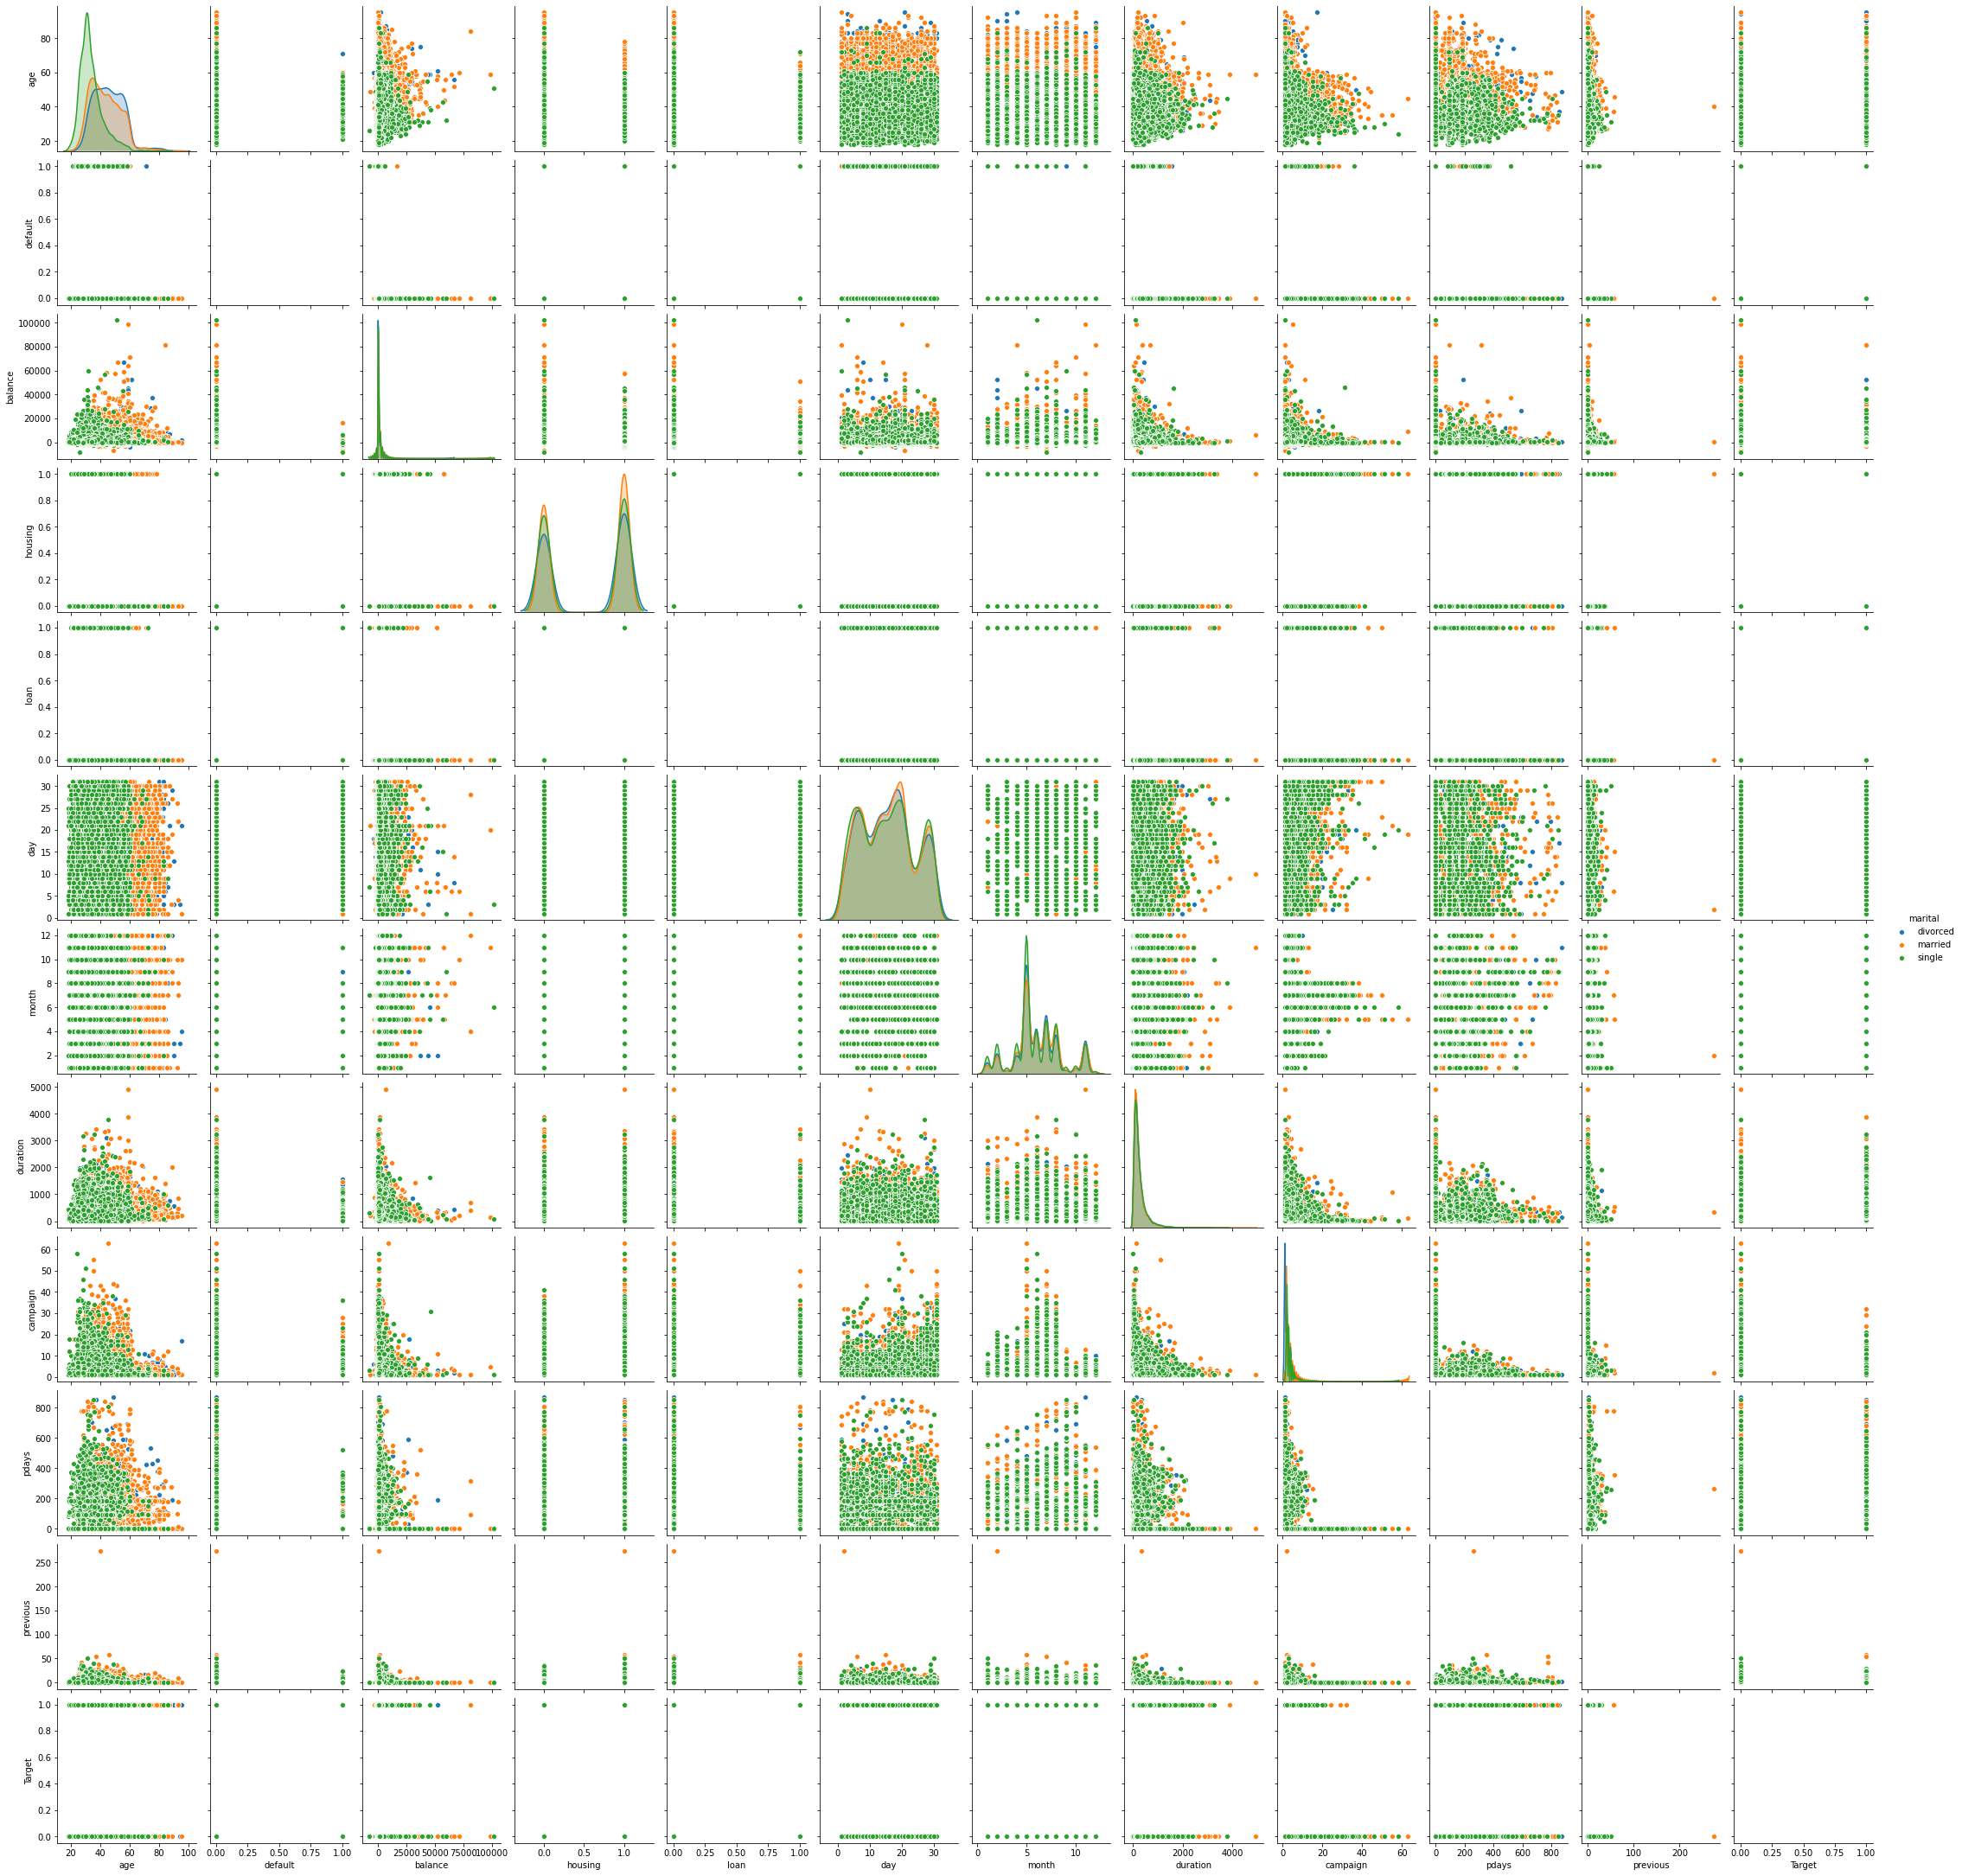

In [23]:
# 2. Multivariate analysis (8 marks)
# a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
# b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

sns.pairplot(bank, hue='marital');


### b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

**Just by looking at the above, the 'day' attribute doesn't seem to have any kind of close relationship as many of the attribute intersected points fill the grid. 'balance' and 'month' don't look too useful but will decide what fields to remove after some data clean-up below.**

In [24]:
#clear unknowns. remove default column
clean_bank = bank.copy()

#Job: clear the unknown job level
clean_bank = clean_bank[clean_bank.job != 'unknown']

#Education: clear the unknown level
clean_bank = clean_bank[clean_bank.education != 'unknown']

#Delete 'default' column
del clean_bank['default']

In [25]:
#remove poutcome = 'unknown' and 'other'
cb2=clean_bank[clean_bank.poutcome != 'unknown']
cb2=cb2[cb2.poutcome != 'other']
cb2.head(10)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
24060,33,admin.,married,tertiary,882,0,0,telephone,21,10,39,1,151,3,failure,0
24064,33,services,married,secondary,3444,1,0,telephone,21,10,144,1,91,4,failure,1
24077,36,management,married,tertiary,0,1,0,telephone,23,10,140,1,143,3,failure,1
24080,56,technician,married,secondary,589,1,0,unknown,23,10,518,1,147,2,success,1
24127,51,admin.,single,secondary,3132,0,0,telephone,5,11,449,1,176,1,failure,0
24151,33,unemployed,divorced,secondary,1005,1,0,telephone,10,11,175,1,174,2,failure,0
24160,34,admin.,married,tertiary,899,1,0,unknown,12,11,114,1,170,3,failure,1
24165,30,admin.,married,secondary,873,1,0,telephone,12,11,119,1,167,3,success,0
24170,30,management,single,tertiary,1243,1,0,telephone,13,11,86,1,174,1,failure,0
24184,44,entrepreneur,married,tertiary,1631,1,0,cellular,17,11,81,1,195,2,failure,0


In [27]:
cb2.shape

(6133, 16)

In [28]:
cb2.job.value_counts()

#use data below to combine certain somewhat relatable jobs

#BEFORE COMBINATION:

management       1385
blue-collar      1170
technician       1008
admin.            825
services          514
retired           382
self-employed     210
entrepreneur      175
unemployed        173
student           168
housemaid         123
unknown             0
Name: job, dtype: int64

In [32]:
#entrepreneurs + self-employed = self-employed
cb2.job.replace(['entrepreneur', 'self-employed'], 'self-employed', inplace=True)

#administrative + management jobs = management
cb2.job.replace(['admin.', 'management'], 'management', inplace=True)

#blue-collar + tecnician jobs = blue-collar
cb2.job.replace(['blue-collar', 'technician'], 'blue-collar', inplace=True)

#retired + unemployed = unemployed
cb2.job.replace(['retired', 'unemployed'], 'unemployed', inplace=True)

#services + housemaid = services
cb2.job.replace(['services', 'housemaid'], 'services', inplace=True)

#show new job totals
cb2.job.value_counts()

#AFTER COMBINATION:

management       2210
blue-collar      2178
services          637
unemployed        555
self-employed     385
student           168
unknown             0
Name: job, dtype: int64

In [33]:
#Combine marital status

#single + divorced = single
cb2.marital.replace(['single', 'divorced'], 'single', inplace=True)

cb2.marital.value_counts()
#AFTER COMBINATION:

married    3591
single     2542
Name: marital, dtype: int64

In [38]:
#Combine education
#My reasoning to combine is because primary and secondary school yields a single high school diploma
#Tertiary would be equivalent to college/university yielding an undergraduate degree, etc.

cb2.education.replace(['primary', 'secondary'], 'basic_education', inplace=True)
cb2.education.replace(['tertiary'], 'university', inplace=True)

cb2.education.value_counts()

basic_education    4025
university         2108
unknown               0
Name: education, dtype: int64

In [97]:
cb3=cb2.copy()

In [98]:
#Make education ask degree or no degree with binary. 0=no degree, 1=yes degree
cb3['education'] = cb3['education'].map({'university': 1, 'basic_education': 0})
cb3.education.value_counts()

0.0    4025
1.0    2108
Name: education, dtype: int64

In [99]:
#Make marital binary: 0=single, 1=married
cb3['marital'] = cb3['marital'].map({'married': 1, 'single': 0})
cb3.marital.value_counts()

1    3591
0    2542
Name: marital, dtype: int64

In [100]:
#Make poutcome binary: 0=failure, 1=success
cb3['poutcome'] = cb3['poutcome'].map({'success': 1, 'failure': 0})

In [101]:
#Make job binary: 0=student, 1=self-employed, 2=unemployed, 3=services, 4=blue-collar, 5=management
cb3['job'] = cb3['job'].map({'student': 0, 'self-employed': 1, 'unemployed': 2, 'services': 3, 'blue-collar': 4,
                             'management': 5})

In [102]:
cb3.job.value_counts()

5.0    2210
4.0    2178
3.0     637
2.0     555
1.0     385
0.0     168
Name: job, dtype: int64

In [103]:
#Make contact binary: 0=telephone, 1=cellular. Combine unknown into cellular as it's negligible.
cb3.contact.replace(['unknown', 'cellular'], 'cellular', inplace=True)
cb3['contact'] = cb3['contact'].map({'cellular': 1, 'telephone': 0})

In [104]:
cb3.contact.value_counts()

1    5714
0     419
Name: contact, dtype: int64

In [105]:
cb3.dtypes

age             int64
job           float64
marital      category
education     float64
balance         int64
housing      category
loan         category
contact      category
day          category
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome      float64
Target       category
dtype: object

In [106]:
#Convert:
# job from float64 to int64
# marital from cat to int64
# education from float64 to int64
# housing from cat to int64
# loan from cat to int64
# contact from float64 to int64
# day from cat to int64
# month from cat to int64
# poutcome from float64 to int64
# Target from category to int64

#convert binary outputs into int64 fields
float_col = ['job','contact','poutcome']

for column in float_col:
    cb3[column] = cb3[column].astype('int64')
    

    
cate_col = ['marital','housing', 'loan','day', 'contact','month','Target']

for column in cate_col:
    cb3[column] = cb3[column].astype('int64')

In [108]:
cb3['education']=cb3['education'].astype('int64')

In [109]:
cb3.dtypes

#all values now int64

age          int64
job          int64
marital      int64
education    int64
balance      int64
housing      int64
loan         int64
contact      int64
day          int64
month        int64
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome     int64
Target       int64
dtype: object

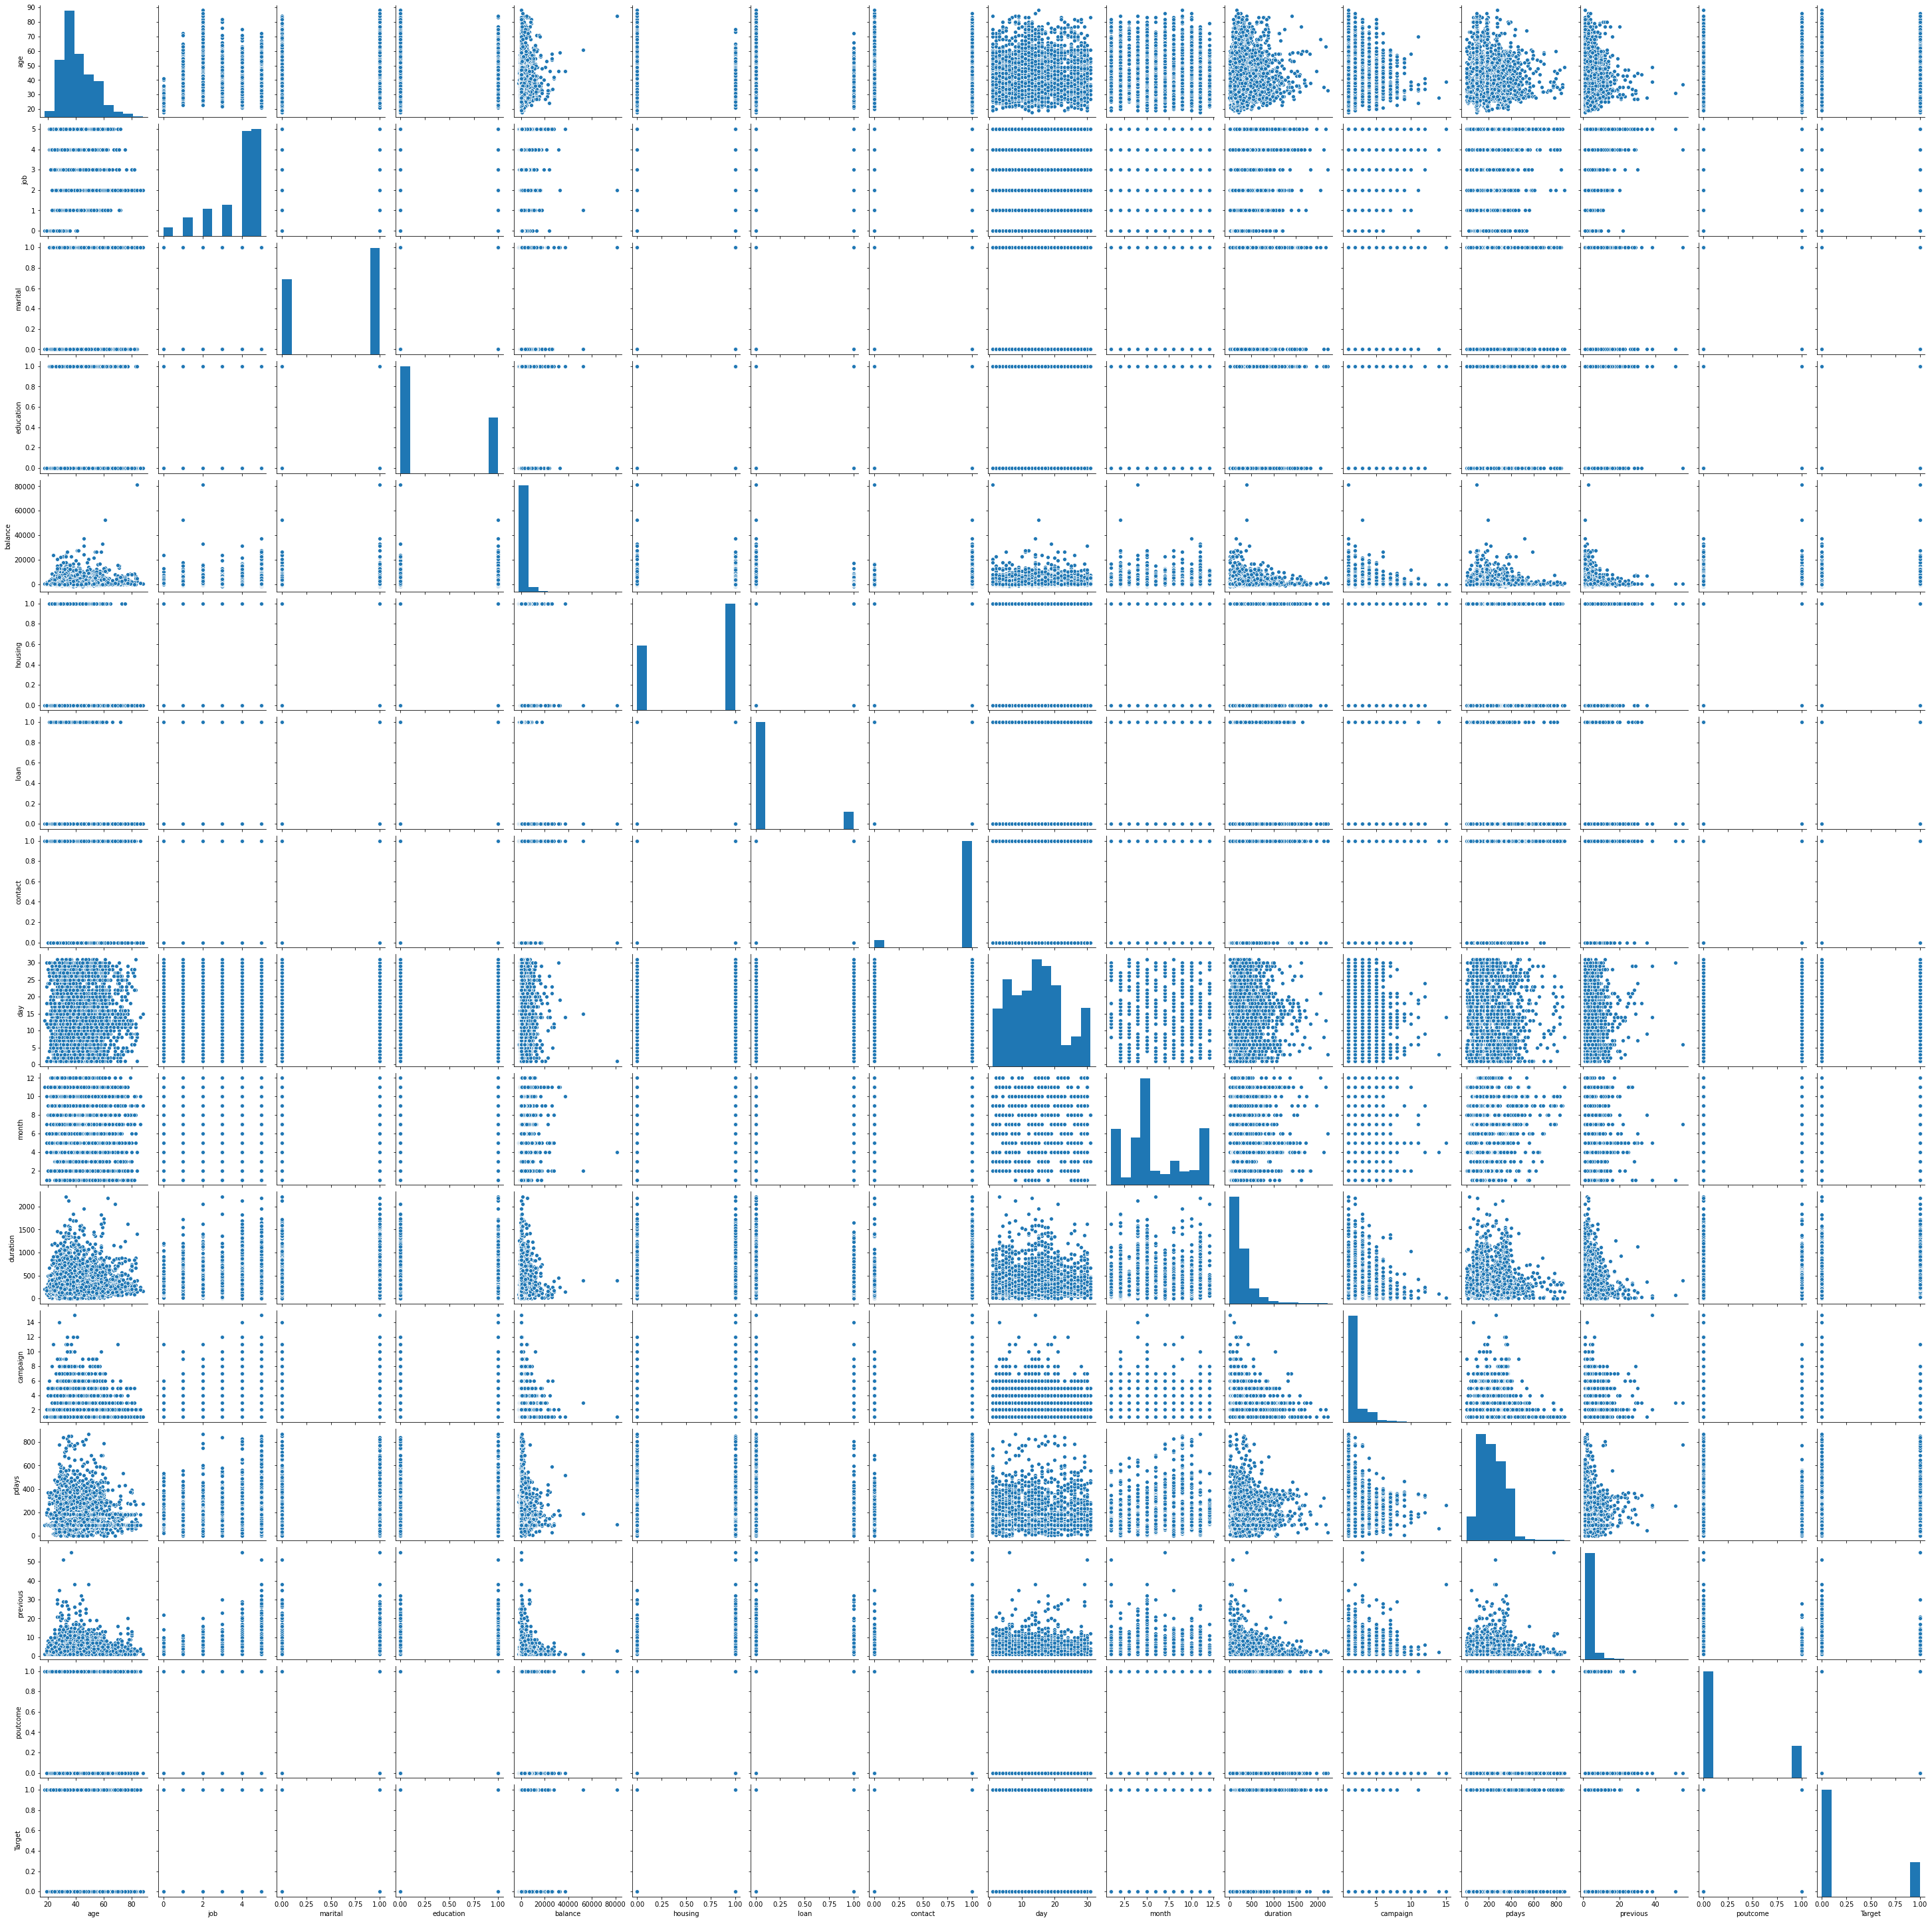

In [110]:
sns.pairplot(cb3);
#made another pairplot after converting all my datatypes to see if I would find anything obvious to remove.
#not too much of a conclusion change after plotting 2nd pairplot.

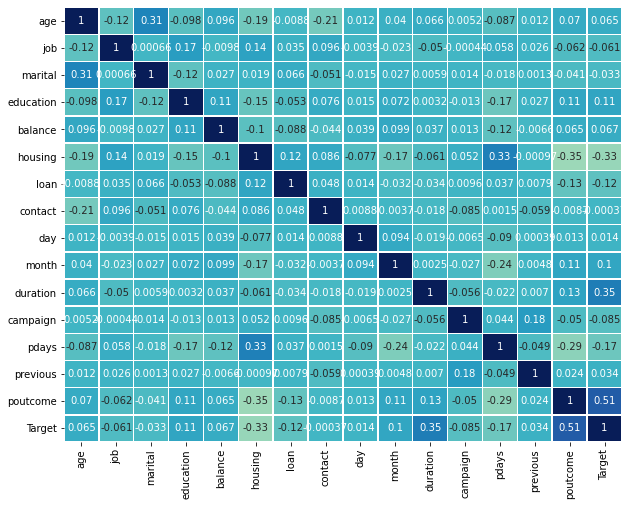

In [111]:
plt.figure(figsize=(10,8))
sns.heatmap(cb3.corr(),
           annot=True,
           linewidths=.5,
           center=0,
           cbar=False,
           cmap="YlGnBu");

**Looking at a pairplot and heatmap correlation after transforming some data and re-categorizing fields. Seems like there is a semi-strong correlation between those that said yes to prior campaign and yes to term deposit (.51)--the strongest correlation in the table (poutcome vs. Target). The next highest is between Target and amount of duration of last contact (0.35). After that is between people who have housing loans and client contact days (0.33). After is marital status vs. age (0.31). If I were to draw a conclusion, I would look into the .51 correspondence and see what factors played into the prior campaign so they may "piggie back" methods to influence people to try term deposits. It may be too early to draw such a conclusion before completing questions 2 and 3.**

### 2) Deliverable – 2 (Prepare the data for analytics) – (10)
1. Ensure the attribute types are correct. If not, take appropriate actions.<br>
**--This was done in the above. The objects were changed to categories.**<br>
<br>
2. Get the data model ready.<br>
**--Analyzed data via uni/bivariate plots and transformed data appropriately above.**<br>
<br>
3. Transform the data i.e. scale / normalize if required<br>
**--Dropped default attribute and combined multiple categories (job, marital, education)<br>
--Also, zero-ed out the unknowns where they were either small or I didn't think should be interpreted (ex: poutcomes--there were already failure and success demarcations. Why do I need unknown and other? It would be difficult to use unknown/other as a "predictor")**<br>

4. Create the training set and test set in ratio of 70:30<br>
**--Please see section below.**

In [260]:
#After reviewing the heatmap and running through several regression iterations, I may have too many irrelevant attributes
# and will remove fields that do not vary much from zero in correlation to other fields as per heatmap:

# -balance
# -day

In [188]:
#Independent variables - exclude the target variable
X = cb3.drop(['balance', 'day', 'Target'], axis=1)
#Target variable
y = cb3[['Target']]

#70:30 split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=0)

In [189]:
X_train.shape, X_test.shape

((4293, 13), (1840, 13))

### 3) Deliverable – 3 (create the ensemble model) – (30)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the
model performance by using different matrices. Use confusion matrix to evaluate
class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the
model. (10 marks)
2. Build the ensemble models (Bagging and Boosting) and note the model performance
by using different matrices. Use same metrics as in above model. (at least 3
algorithms) (15 marks)
3. Make a DataFrame to compare models and their metrics. Give conclusion regarding
the best algorithm and your reason behind it. (5 marks)

In [190]:
# 1. First create models using Logistic Regression and Decision Tree algorithm. Note the
# model performance by using different matrices. Use confusion matrix to evaluate
# class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the
# model. (10 marks)

from sklearn.linear_model import LogisticRegression
#Model via Logistic Regression algorithm
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
# Predicting the target variable on test data
y_predict = lr.predict(X_test)

# Predicted vs. observed
z = X_test.copy()
z['Observed'] = y_test
z['Predicted'] = y_predict
z.head()

In [192]:
#Confusion Matrix
def draw_cm(actual,predicted):
    cm = confusion_matrix(actual,predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig Accuracy 0.8283251805264384
Testing Accuracy 0.8456521739130435
Recall: 0.5848623853211009
Precision: 0.7122905027932961
F1 Score: 0.6423173803526449
ROC_AUC_Score: 0.7557502809796388

Confusion Matrix


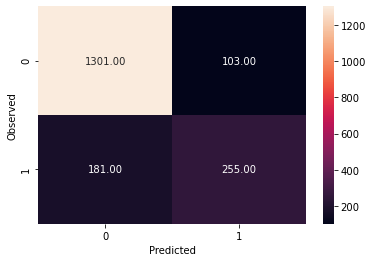

None


In [193]:
print("Trainig Accuracy",lr.score(X_train,y_train))  
print("Testing Accuracy",lr.score(X_test, y_test))
print("Recall:",recall_score(y_test,y_predict))
print("Precision:",precision_score(y_test,y_predict))
print("F1 Score:",f1_score(y_test,y_predict))
print("ROC_AUC_Score:",roc_auc_score(y_test,y_predict))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))

**Looking at the accuracy, recall, precision, f1 score, roc_score and confusion matrix, my observations are:<br>
--accuracy is good since the test result is greater than training and in the 80's percent<br>
--f1 (recall and precision): decent balance between recall and precision. has a good prediction of what was actually true and able to pull the data that was relevant<br>
--roc_auc is decent as well as it's 25% higher than random (since auc=50% is the random measure)<br>
--confusion matrix: true positives/negatives are higher than false positives/negatives, which is good**

In [195]:
# Decision Tree Analysis

model_ent = DecisionTreeClassifier(criterion='entropy')

In [196]:
model_ent.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [197]:
print("Trainig Accuracy:",model_ent.score(X_train,y_train))  
print("Testing Accuracy:",model_ent.score(X_test, y_test))

Trainig Accuracy: 1.0
Testing Accuracy: 0.8010869565217391


**The train vs. test accuracy has a huge gap, which means the dataset is overfit--must prune**

In [209]:
pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=10)
pruned.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [204]:
print("Trainig Accuracy:",pruned.score(X_train,y_train))  
print("Testing Accuracy:",pruned.score(X_test, y_test))

Trainig Accuracy: 0.8409037968786397
Testing Accuracy: 0.8472826086956522


**Accuracy is much closer so decision tree no longer overfit**

In [215]:
y_train.sum()

Target    1068
dtype: int64

In [219]:
ptrain=pruned.predict(X_train)
ptest=pruned.predict(X_test)

In [235]:
#store for conclusion dataframe
DecTree_Acc=accuracy_score(y_test,ptest)

In [236]:
print("Accuracy:",DecTree_Acc)

Accuracy: 0.841304347826087


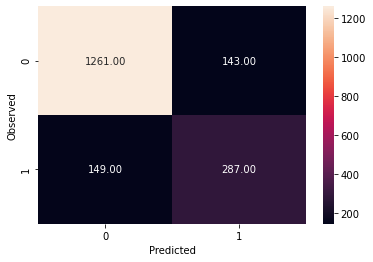

None


In [224]:
# Decision Tree Confusion Matrix stats
print(draw_cm(y_test,ptest))

In [241]:
print("Recall:",recall_score(y_test,ptest))
print("Precision:",precision_score(y_test,ptest))
print("F1 Score:",f1_score(y_test,ptest))

Recall: 0.658256880733945
Precision: 0.6674418604651163
F1 Score: 0.6628175519630485


**Comparing Accuracy and F1 scores between Logistic Regression vs. Decision Tree methods yield similar results. Although Precision/Recall is different than the Logistic Regression algorithm, the F1 score is only a little higher via Decision Tree.**

In [ ]:
# 2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. 
# Use same metrics as in above model. (at least 3 algorithms) (15 marks)

#Random Forest
#Adaboost
#Bagging

In [237]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

In [240]:
pRF = rfcl.predict(X_test)
RandomF_Acc = accuracy_score(y_test, pRF)

Accuracy:  0.8608695652173913
Recall: 0.6330275229357798
Precision: 0.7419354838709677
F1 Score: 0.6831683168316832

Confusion Matrix


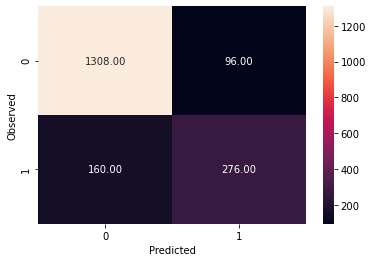

None


In [243]:
print("Accuracy: ",RandomF_Acc)
print("Recall:",recall_score(y_test,pRF))
print("Precision:",precision_score(y_test,pRF))
print("F1 Score:",f1_score(y_test,pRF))
print()
print('Confusion Matrix')
print(draw_cm(y_test,pRF))

**An slight increase in accuracy and F1 but still around the same results as prior algorithms.**

In [244]:
#Adaboost

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=0)
ada = ada.fit(X_train, y_train)

In [246]:
pADA =ada.predict(X_test)
Adaboost_Acc = accuracy_score(y_test, pADA)

Accuracy:  0.8505434782608695
Recall: 0.5527522935779816
Precision: 0.7507788161993769
F1 Score: 0.6367239101717305

Confusion Matrix


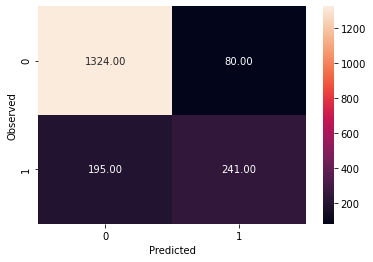

None


In [247]:
print("Accuracy: ", Adaboost_Acc)
print("Recall:",recall_score(y_test,pADA))
print("Precision:",precision_score(y_test,pADA))
print("F1 Score:",f1_score(y_test,pADA))
print()
print('Confusion Matrix')
print(draw_cm(y_test,pADA))

**Accuracy has stayed close to the same, while F1 has decrease slightly. Both still close when compared to algorithms above.**

In [248]:
#Bagging

from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state= 0)
bag = bag.fit(X_train, y_train)

In [249]:
pBag = bag.predict(X_test)
Bagging_Acc = accuracy_score(y_test, pBag)

Accuracy:  0.8472826086956522
Recall: 0.6169724770642202
Precision: 0.7023498694516971
F1 Score: 0.6568986568986569

Confusion Matrix


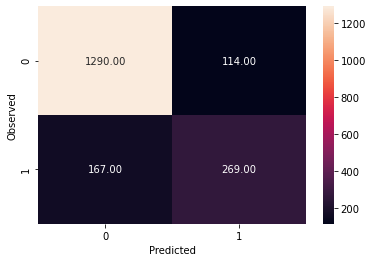

None


In [250]:
print("Accuracy: ", Bagging_Acc)
print("Recall:",recall_score(y_test,pBag))
print("Precision:",precision_score(y_test,pBag))
print("F1 Score:",f1_score(y_test,pBag))
print()
print('Confusion Matrix')
print(draw_cm(y_test,pBag))

**Again, not much to say that is significantly different in terms of accuracy and F1 scores.** 

In [259]:
# 3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your 
# reason behind it. (5 marks)

result = pd.DataFrame({'Method':['Logistic Regression','Decision Tree', 'Random Forest', 'Adaboost', 'Bagging'], 
                        'Accuracy': [lr.score(X_test, y_test), DecTree_Acc, RandomF_Acc, Adaboost_Acc, Bagging_Acc],
                        'Recall' :[recall_score(y_test,y_predict),recall_score(y_test,ptest),recall_score(y_test,pRF),
                                    recall_score(y_test,pADA),recall_score(y_test,pBag)],
                        'Precision':[precision_score(y_test,y_predict), precision_score(y_test,ptest), 
                                    precision_score(y_test,pRF),precision_score(y_test,pADA), 
                                    precision_score(y_test,pBag)],
                        'F1':[f1_score(y_test,y_predict),f1_score(y_test,ptest),f1_score(y_test,pRF),
                                    f1_score(y_test,pADA),f1_score(y_test,pBag)]})
result

,Method,Accuracy,Recall,Precision,F1
0,Logistic Regression,0.845652,0.584862,0.712291,0.642317
1,Decision Tree,0.841304,0.658257,0.667442,0.662818
2,Random Forest,0.860870,0.633028,0.741935,0.683168
3,Adaboost,0.850543,0.552752,0.750779,0.636724
4,Bagging,0.847283,0.616972,0.702350,0.656899


## **I would select the Random Forest method as it has the highest accuracy and second highest recall/precision measurements. It would give me confidence that what I guessed was true was actually true, balanced with decently high recall rate so I knew I included the right data points. The combination recall/precision F1 score is the highest in the results as well, which makes me further confident in my conclusion.** 